In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [195]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers =5,random_state=3)


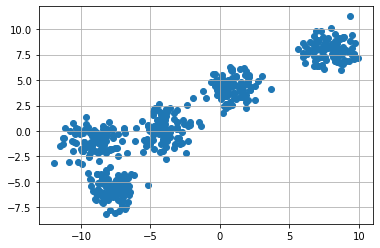

In [196]:
plt.grid('on')
plt.scatter(X[:,0],X[:,1])
plt.show()

In [197]:
k=5
color = ["green","yellow","blue","red","orange"]
clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i]=cluster

In [198]:
clusters

{0: {'center': array([ 3.53072293, -1.91114385]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 1.51053634, -4.65986426]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([0.13423171, 7.81001406]), 'points': [], 'color': 'blue'},
 3: {'center': array([ 4.30262144, -8.40059408]),
  'points': [],
  'color': 'red'},
 4: {'center': array([9.8455925 , 2.73146571]),
  'points': [],
  'color': 'orange'}}

In [199]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [200]:
def intialize_clusters(clusters):
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
        for i in range(k):
            dist.append(distance(curr_x,clusters[i]['center']))
        current_cluster = np.argmin(dist)
        clusters[current_cluster]["points"].append(curr_x)

In [201]:
intialize_clusters(clusters)

In [202]:
def updateclusters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]["points"])
        if pts.shape[0]>0:
            new_u = np.mean(pts,axis=0)
            clusters[i]['center'] = new_u
            clusters[i]['points'] = []
def plotclustercenters(clusters):
    for i in range(k):
        pts = clusters[i]["points"]
        print(len(pts))
        pts = np.array(pts)
        try:
            plt.scatter(pts[:,0],pts[:,1],color = clusters[i]['color'])
        except:
            pass
        uk = clusters[i]['center']
        plt.scatter(uk[0],uk[1],color = 'black',marker='*')

17
263
130
0
90


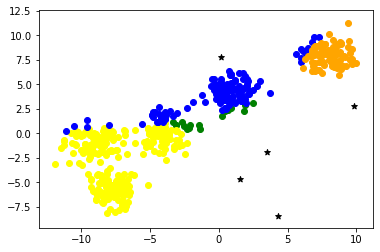

In [203]:
plotclustercenters(clusters)

34
526
260
0
180


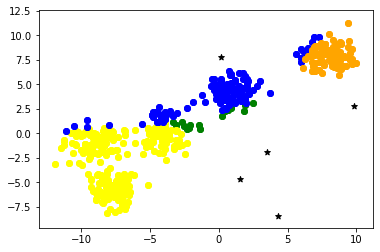

In [204]:
intialize_clusters(clusters)
plotclustercenters(clusters)
updateclusters(clusters)

In [241]:
from sklearn.cluster import KMeans
X,y = make_blobs(n_samples = 500,n_features = 2,centers =5,random_state=3)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [242]:
centers = kmeans.cluster_centers_

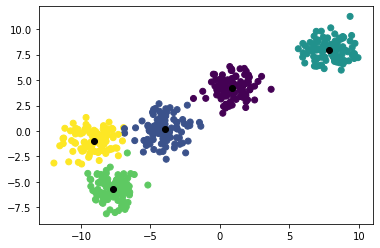

In [243]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(centers[:,0],centers[:,1],color='black')
plt.show()

In [208]:
from sklearn.datasets import make_circles,make_moons


In [209]:
X,y = make_moons(n_samples=200,noise=0.10)

In [210]:
y.shape

(200,)

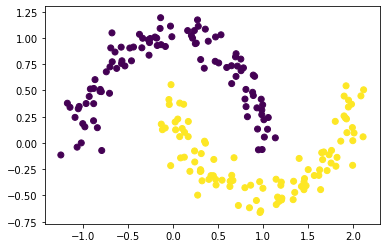

In [211]:
plt.scatter(X[:,0],X[:,1],c=y)


In [212]:
km = KMeans(n_clusters=2)

In [213]:
km.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [214]:
km.labels_

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0])

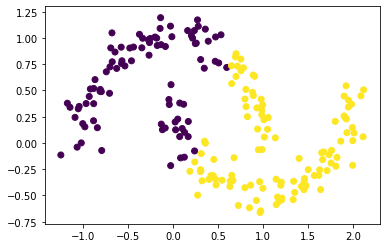

In [215]:
plt.scatter(X[:,0],X[:,1],c=km.labels_)

In [216]:
from sklearn.cluster import DBSCAN

In [237]:
db = DBSCAN(eps=0.20,min_samples=5)

In [238]:
db.fit(X,y)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [239]:
y_pred = db.fit_predict(X,y)

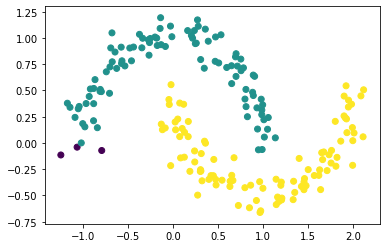

In [240]:
plt.scatter(X[:,0],X[:,1],c=y_pred)